<a href="https://colab.research.google.com/github/NNAIZ/-My-Best-Projects-/blob/main/%E2%97%8F_ARIMA_using_Nasdaq_Datalink_library.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
# pandas is aliased as pd
import matplotlib.pyplot as plt
# pyplot is aliased as plt
import numpy as np
# numpy is aliased as np

In [2]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.9 MB/s eta 0:00:00


In [3]:
from pmdarima.arima import auto_arima


In [4]:
!pip install nasdaq-data-link

In [5]:
import nasdaqdatalink

In [6]:
df = nasdaqdatalink.get("BP/OIL_RESERVES_IDN")
df.head()

,Value
Date,
1980-12-31,11.603
1981-12-31,11.018
1982-12-31,10.534
1983-12-31,10.080
1984-12-31,9.611


In [8]:
print(df.index.min())
print(df.index.max())

1980-12-31 00:00:00
2020-12-31 00:00:00


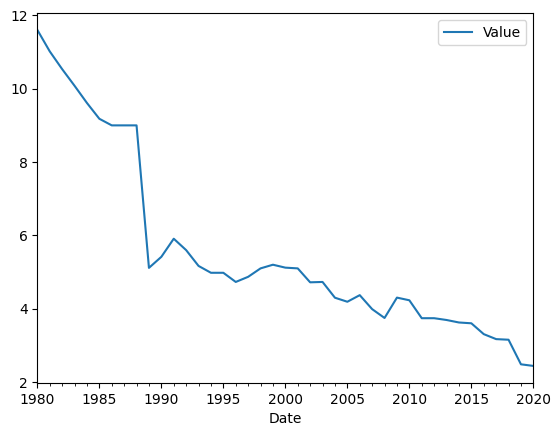

In [15]:
df.plot()
plt.show()

In [17]:
!pip install statsmodels

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

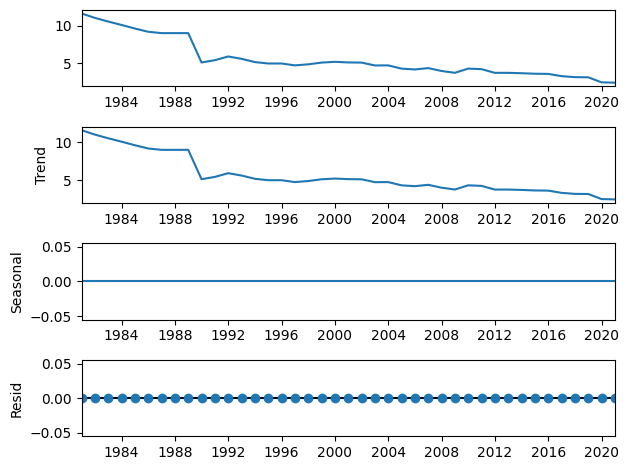

In [20]:
decompose =seasonal_decompose(df,model='additive')
decompose.plot()
plt.show()

In [22]:
#df.dtypes
df.columns

Index(['Value'], dtype='object')

In [25]:
train=df['Value'] [:30]
test=df['Value'][30:]
print(train.shape)
print(train.shape)
print(type(train))
print(type(test))

(30,)
(30,)
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


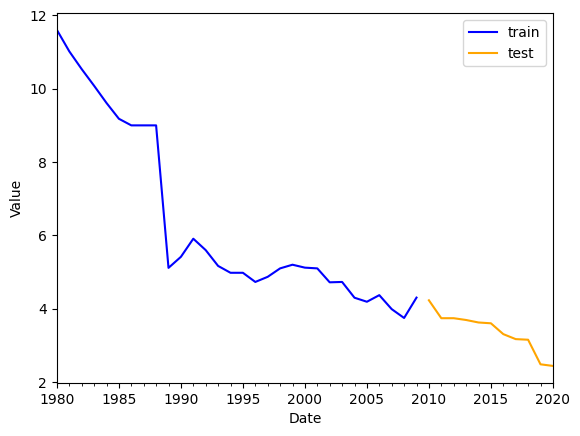

In [30]:
train.plot(color='Blue',label='train')
test .plot(color='orange',label='test')
plt.ylabel('Value')

plt.legend()
plt.show()

In [34]:
train .head()

Date
1980-12-31    11.603
1981-12-31    11.018
1982-12-31    10.534
1983-12-31    10.080
1984-12-31     9.611
Name: Value, dtype: float64

In [36]:
test.tail()

Date
2016-12-31    3.30690
2017-12-31    3.17090
2018-12-31    3.15430
2019-12-31    2.48397
2020-12-31    2.44000
Name: Value, dtype: float64

In [39]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [42]:
def eval_model(ytest,ypred):
    mean1 = mean_absolute_error(ytest,ypred)
    mean2 = mean_squared_error(ytest,ypred)
    mean3 = np.sqrt(mean_squared_error(ytest,ypred))
    print('mean1',mean1)
    print('mean2',mean2)
    print('mean3',mean3)

In [43]:
from statsmodels.tsa.arima.model  import ARIMA

In [46]:

m1=ARIMA(train,order=(2,1,2))
arima_1=m1.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [45]:
print(test.shape)

(11,)


In [47]:
fcast_1=arima_1.forecast(11)
fcast_1

2010-12-31    4.157736
2011-12-31    4.081800
2012-12-31    3.943683
2013-12-31    3.868734
2014-12-31    3.737335
2015-12-31    3.663496
2016-12-31    3.538418
2017-12-31    3.465795
2018-12-31    3.346669
2019-12-31    3.275351
2020-12-31    3.161833
Freq: A-DEC, Name: predicted_mean, dtype: float64

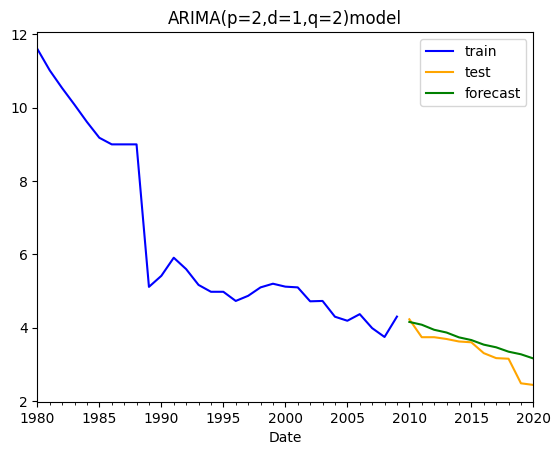

In [49]:
train.plot(color='blue',label='train')
test.plot(color='orange',label='test')
fcast_1.plot(color='green',label='forecast')
plt.title('ARIMA(p=2,d=1,q=2)model')
plt.legend()
plt.show()

In [50]:
eval_model(test,fcast_1)

mean1 0.29064701605070475
mean2 0.1394992315608455
mean3 0.37349595922960865


In [52]:
m_2=ARIMA(train,order=(1,1,1))
arima_2=m_2.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters 

In [53]:
print(test.shape)

(11,)


In [55]:
fcast_2=arima_2.forecast(11)
fcast_2

2010-12-31    4.297617
2011-12-31    4.296625
2012-12-31    4.296442
2013-12-31    4.296408
2014-12-31    4.296402
2015-12-31    4.296401
2016-12-31    4.296401
2017-12-31    4.296401
2018-12-31    4.296401
2019-12-31    4.296401
2020-12-31    4.296401
Freq: A-DEC, Name: predicted_mean, dtype: float64

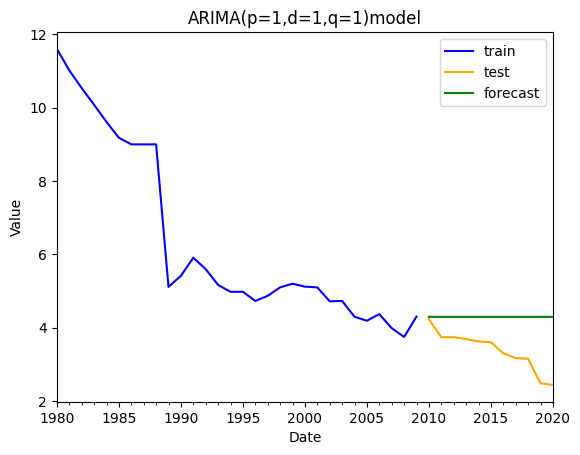

In [57]:
train.plot(color='blue',label='train')
test.plot(color='orange',label='test')
fcast_2.plot(color='green',label='forecast')
plt.title('ARIMA(p=1,d=1,q=1)model')
plt.ylabel('Value')
plt.legend()
plt.show()

In [58]:
eval_model(test,fcast_2)

mean1 0.9157852696424897
mean2 1.1090975016415656
mean3 1.053136981423388


In [59]:
eval_model(test,fcast_1)

mean1 0.29064701605070475
mean2 0.1394992315608455
mean3 0.37349595922960865
